<a href="https://colab.research.google.com/github/saipavanpatnapu/Rainfall_Prediction/blob/main/rainfall_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing Libraries**

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 2.9 MB/s eta 0:00:00


**Load and Preprocess Dataset**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('rainfall.csv')

# Example preprocessing (customize based on dataset)
df.ffill(inplace=True)
df['RainTomorrow'] = df['Rainfall'].apply(lambda x: 1 if x > 0 else 0)

# Drop unwanted columns
X = df.drop(['Rainfall', 'RainTomorrow'], axis=1)
y = df['RainTomorrow']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Train And Evaluate The Models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    matrix = confusion_matrix(y_test, y_pred)

    results[name] = {
        'accuracy': acc,
        'report': report,
        'conf_matrix': matrix
    }

    print(f"\n🔹{name} Model🔹:\n")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", matrix)



🔹Logistic Regression Model🔹:

Accuracy: 0.525
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.82      0.60        17
           1       0.70      0.30      0.42        23

    accuracy                           0.53        40
   macro avg       0.58      0.56      0.51        40
weighted avg       0.60      0.53      0.50        40

Confusion Matrix:
 [[14  3]
 [16  7]]

🔹Naive Bayes Model🔹:

Accuracy: 0.475
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.71      0.53        17
           1       0.58      0.30      0.40        23

    accuracy                           0.47        40
   macro avg       0.51      0.51      0.47        40
weighted avg       0.52      0.47      0.46        40

Confusion Matrix:
 [[12  5]
 [16  7]]

🔹Decision Tree Model🔹:

Accuracy: 0.625
Classification Report:
               precision    recall  f1-score   support

           0    

**Compare The Model Accuracies**

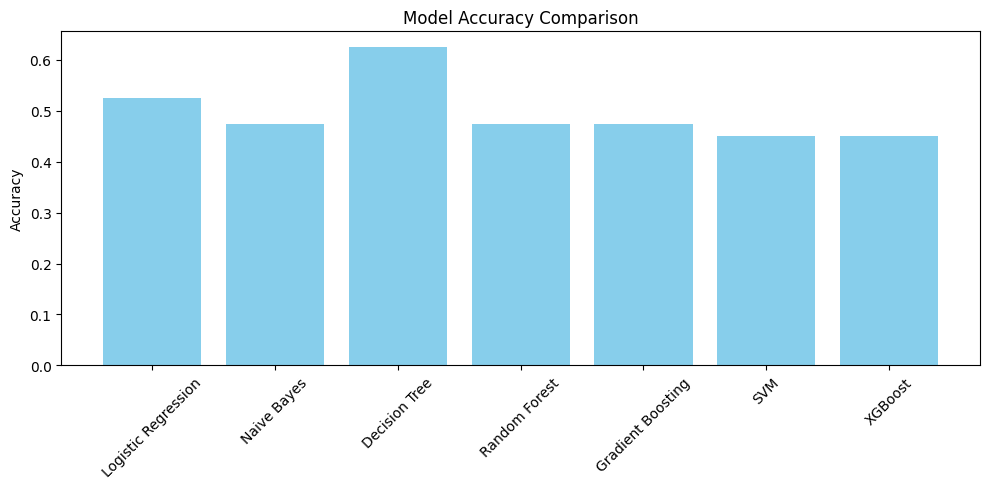

In [ ]:
import matplotlib.pyplot as plt

model_names = list(results.keys())
accuracies = [results[m]['accuracy'] for m in model_names]

plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracies, color='skyblue')
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.tight_layout()
plt.show()


**Create The "model" Directory**

In [ ]:
import pandas as pd

# Use same feature columns as training
custom_input_df = pd.DataFrame([[2024, 7, 30.0, 78, 12]], columns=X.columns)
scaled_input = scaler.transform(custom_input_df)

prediction = best_model.predict(scaled_input)
print("Rain Expected ☔" if prediction[0] == 1 else "No Rain 🌤️")


No Rain 🌤️


**Save The Best Model**

In [ ]:
import pickle

best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = models[best_model_name]

with open('models/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print(f"\nBest model saved: {best_model_name}")




Best model saved: Decision Tree
